In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df_train=pd.read_csv('C:/Users/samata.suresh.naik/Documents/Stats and ML/Stats/Class 4/HouseData.csv')

In [5]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Analyse the sales 

In [11]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

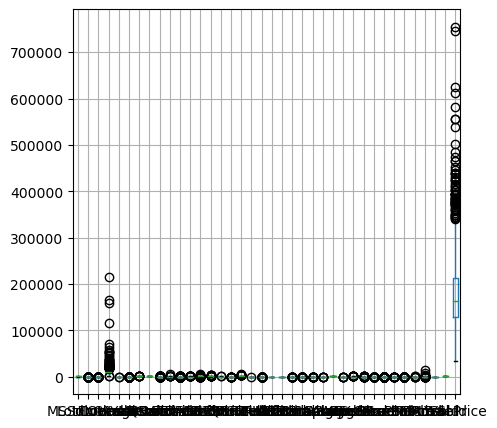

In [6]:
boxplot=df_train.boxplot(figsize=(5,5))

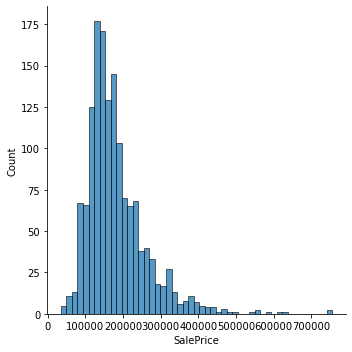

In [12]:
#histogram
sns.displot(df_train['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

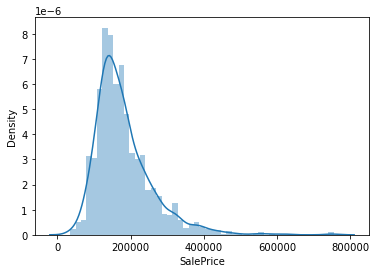

In [13]:
sns.distplot(df_train['SalePrice'])

##### Relationships

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

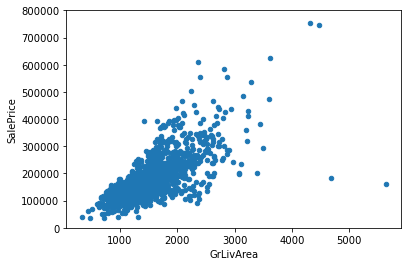

In [19]:
# Scatter plot grlivarea/saleprice
var='GrLivArea'
data=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

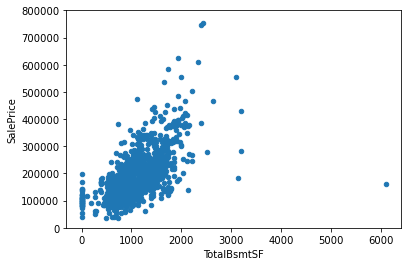

In [20]:
var='TotalBsmtSF'
data=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

### Relationship with categorical variables

(-0.5, 9.5, 0.0, 800000.0)

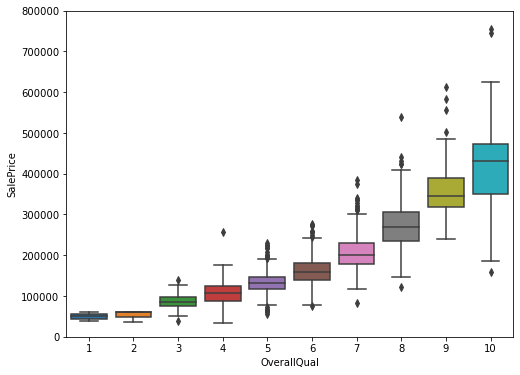

In [21]:
#box plot overallqual/saleprice
var='OverallQual'
data=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
f,ax= plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var,y='SalePrice', data=data)
fig.axis(ymin=0,ymax=800000)

(-0.5, 111.5, 0.0, 800000.0)

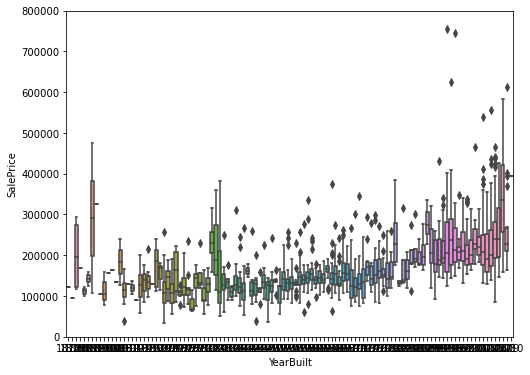

In [22]:
var='YearBuilt'
data=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
f,ax= plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var,y='SalePrice', data=data)
fig.axis(ymin=0,ymax=800000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

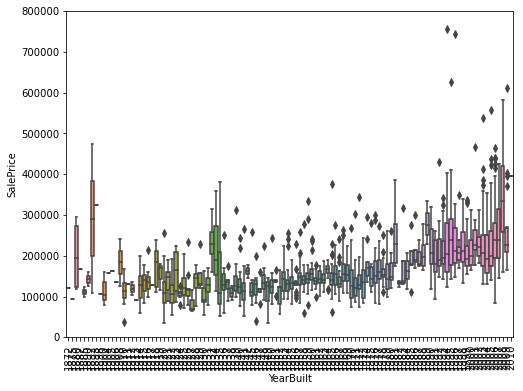

In [23]:
var='YearBuilt'
data=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
f,ax= plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var,y='SalePrice', data=data)
fig.axis(ymin=0,ymax=800000)
plt.xticks(rotation=90)

### Corelation

In [7]:
#correlation matrix(always look for values greater then 0.75)
cormat=df_train.corr()
print(cormat)
cormat.to_csv('correlation_matrix.csv')

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415  

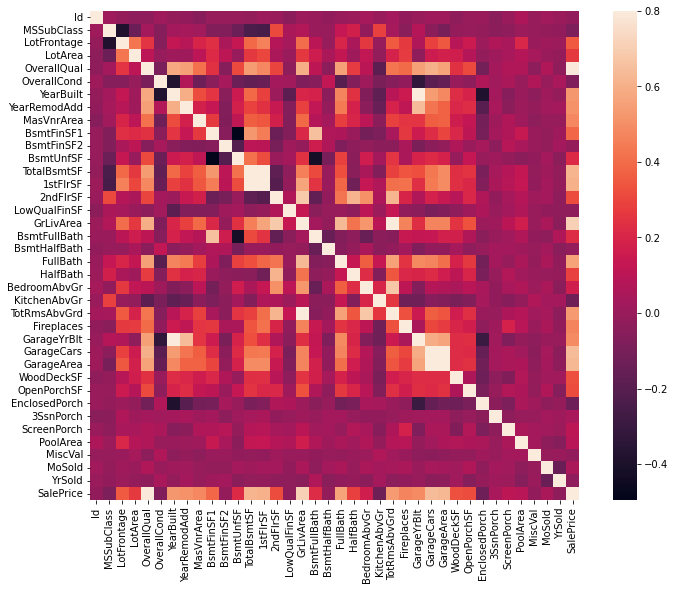

In [25]:
f ,ax =plt.subplots(figsize=(12,9))
sns.heatmap(cormat,vmax=.8,square=True);

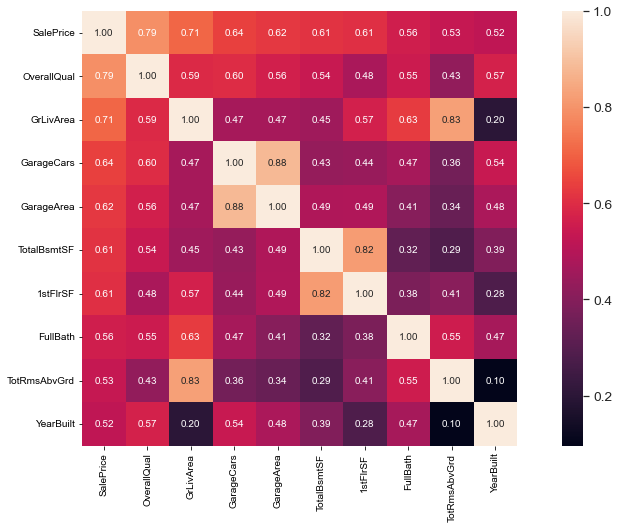

In [27]:
#saleprice corelation matrix
k=10 #no of variables for heatmap
cols=cormat.nlargest(k,'SalePrice')['SalePrice'].index
cm=np.corrcoef(df_train[cols].values.T)
f, ax =plt.subplots(figsize=(16,8))
sns.set(font_scale=1.25)
hm=sns.heatmap(cm,cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size':10},
               yticklabels=cols.values, xticklabels=cols.values)
plt.show()

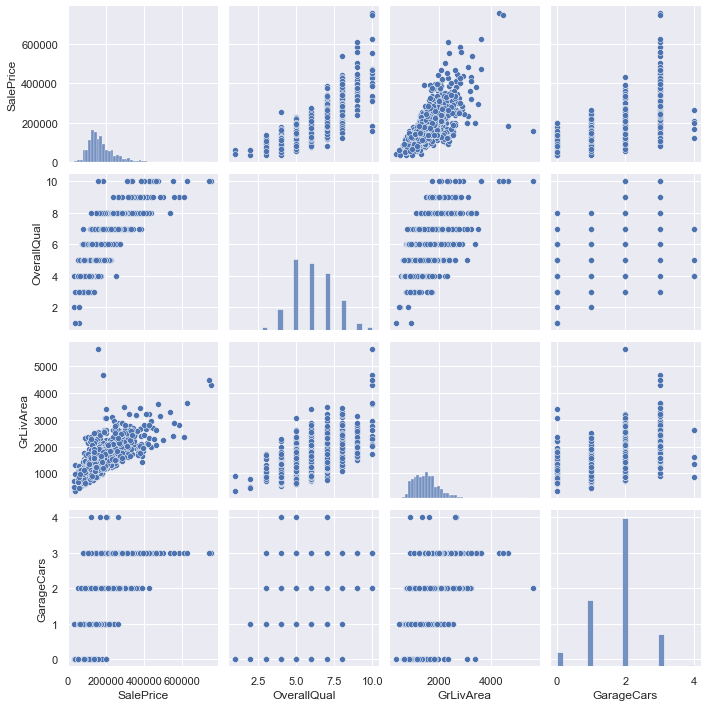

In [28]:
#scatterplot

sns.set()
cols=['SalePrice','OverallQual','GrLivArea','GarageCars']
sns.pairplot(df_train[cols],size=2.5)
plt.show()

### Misssing Values

In [31]:
#missing values
total=df_train.isnull().sum().sort_values(ascending=False)
percent=(df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [ ]:
# if there is more then 30% missing data drop the column.(Do not drop the row)

In [32]:
#dealing with missing data
df_train=df_train.drop((missing_data[missing_data['Total']>600]).index,1)
df_train=df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #to check if there is no missing data
                       

259